In [4]:
# K-邻近算法API -- sklearn.neigbors.KNeighborsClassifier(n_neighbors=5)
from sklearn .neighbors import KNeighborsClassifier

x = [[0], [1], [10], [20]]
y = [0, 0, 1, 1]

# 实例化API
estimator = KNeighborsClassifier(n_neighbors=2)

# 使用fit方法进行训练
estimator.fit(x, y)

print(estimator.predict([[5]]))

[0]


## 欧式距离（Euclidean Distance）

## 曼哈顿距离（Manhattan Distance）
d = |x1 - x2| + |y1 - y2|

## 切比雪夫距离（Chebyshev Distance）
d = max(|x1 - x2|, |y1 - y2|)

In [10]:
from sklearn.datasets import load_iris, fetch_20newsgroups

iris = load_iris()
# print(iris)

print("*********特征值: ", iris.data)
print("*********目标值: ",iris["target"])
print("*********特折值名字: ",iris.feature_names)
print("*********目标值名字: ",iris.target_names)
print("*********描述: ",iris.DESCR)

*********特征值:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.

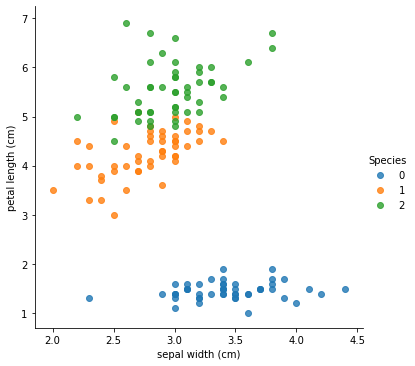

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_d = pd.DataFrame(iris["data"], columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
iris_d["Species"] = iris.target

def plot_iris(iris, col1, col2):
    sns.lmplot(x = col1, y = col2, data = iris, hue = "Species", fit_reg= False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
plot_iris(iris_d, 'sepal width (cm)', "petal length (cm)")

## 数据集的划分

In [17]:
from sklearn.model_selection import train_test_split

# test_size 测试集的大小
# random_state是随机数种子，不同的种子会造成不同的随机采样结果。相同的种子采样结果相同
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 22)
print(x_train, x_test, y_train, y_test)

[[4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.5 2.5 4.  1.3]
 [5.5 2.6 4.4 1.2]
 [5.7 2.8 4.5 1.3]
 [5.  3.4 1.6 0.4]
 [5.1 3.4 1.5 0.2]
 [4.9 3.6 1.4 0.1]
 [6.9 3.1 5.4 2.1]
 [6.7 2.5 5.8 1.8]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 4.7 1.6]
 [5.4 3.9 1.3 0.4]
 [4.4 3.2 1.3 0.2]
 [6.7 3.  5.  1.7]
 [5.6 3.  4.1 1.3]
 [5.7 2.5 5.  2. ]
 [6.5 3.  5.8 2.2]
 [5.  3.6 1.4 0.2]
 [6.1 2.8 4.  1.3]
 [6.  3.4 4.5 1.6]
 [6.7 3.  5.2 2.3]
 [5.7 4.4 1.5 0.4]
 [5.4 3.4 1.7 0.2]
 [5.  3.5 1.3 0.3]
 [4.8 3.  1.4 0.1]
 [5.5 4.2 1.4 0.2]
 [4.6 3.6 1.  0.2]
 [7.2 3.2 6.  1.8]
 [5.1 2.5 3.  1.1]
 [6.4 3.2 4.5 1.5]
 [7.3 2.9 6.3 1.8]
 [4.5 2.3 1.3 0.3]
 [5.  3.  1.6 0.2]
 [5.7 3.8 1.7 0.3]
 [5.  3.3 1.4 0.2]
 [6.2 2.2 4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [6.4 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [5.9 3.2 4.8 1.8]
 [5.4 3.9 1.7 0.4]
 [6.  2.2 4.  1. ]
 [6.4 2.8 5.6 2.1]
 [4.8 3.4 1.9 0.2]
 [6.4 3.1 5.5 1.8]
 [5.9 3.  4.2 1.5]
 [6.5 3.  5.5 1.8]
 [6.  2.9 4.5 1.5]
 [5.5 2.4 3.8 1.1]
 [6.2 2.9 4.

## 特征工程
通过转换函数将特征数据转换成更适合算法模型的特征数据过程

### 归一化
通过对原始数据进行变换把数据映射到\[0, 1\]之间

![](normalization.png)

max min为一列中最大值和最小值， mx和mi分别为指定区间值默认mx为1， mi为0

最大值和最小值是在变化的， 并且最大值和最小值容易受异常点的影响

In [36]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("./untitled.txt")
print(data)
print()

transfer = MinMaxScaler(feature_range=(2, 3))
data = transfer.fit_transform(data[[data.columns[0], data.columns[1], data.columns[2]]])
print(data)

   milage    Liters   Consumtime   target
0   40920  8.326976     0.953952        3
1   14488  7.153469     1.673804        2
2   26052  1.441871     0.805124        1
3   75136  1.669788     0.135296        1

[[2.43582641 3.         2.53211033]
 [2.         2.82955859 3.        ]
 [2.19067405 2.         2.43537505]
 [3.         2.03310291 2.        ]]


### 标准化
通过原始元素进行变换把数据变换到均值为0，标准差为1的范围内
![](formalization.png)

mean: 平均值

标准差

In [40]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./untitled.txt")
print(data)
print()

transfer = StandardScaler()
data = transfer.fit_transform(data[[data.columns[0], data.columns[1], data.columns[2]]])
print(data)
print("每一列的平均值 ", transfer.mean_)
print("每一列特征的方差 ", transfer.var_)

   milage    Liters   Consumtime   target
0   40920  8.326976     0.953952        3
1   14488  7.153469     1.673804        2
2   26052  1.441871     0.805124        1
3   75136  1.669788     0.135296        1

[[ 0.07770278  1.17879272  0.11325458]
 [-1.08200353  0.80278285  1.43015279]
 [-0.57463202 -1.02730186 -0.15901156]
 [ 1.57893277 -0.95427371 -1.3843958 ]]
每一列的平均值  [3.914900e+04 4.648026e+00 8.920440e-01]
每一列特征的方差  [5.19474235e+08 9.74031230e+00 2.98800980e-01]


In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 获取数据
iris = load_iris()

# 数据基本处理
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)

# 特征工程
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# KNN
estimator = KNeighborsClassifier(n_neighbors=5)
estimator.fit(x_train, y_train)

# 模型评估
y_pre = estimator.predict(x_test)
print("预测值： ", y_pre)
print("预测值和真实值的对比：", y_pre == y_test)

# 准确率计算
score = estimator.score(x_test, y_test)
print("准确率: ",score) 

预测值：  [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
预测值和真实值的对比： [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
准确率:  0.9333333333333333


## 交叉验证 cross validation
将拿到的训练数据，分为训练和验证集。将数据分成4份，其中一份作为验证集。经过4次测试，每次更换不同的验证集，就得到了4组模型的结果，取平均值作为最终结果。又称4折交叉验证。
![](training.png)

目的： 为了让被评估的模型更加可信

## 网格搜索 Grid Search
有很多参数是需要手动指定的,例如“n_neighbors=5”，这种叫超参数。但是手动过程繁杂，所以需要对模型预设几种超参数组合。每组超参数都采用交叉验证来进行评估，最后选出最优参数组合建立模型。
![](model.png)

#### API： 
```python
sklearn.model_selection.GridSearchCV(estimator, param_grid=None, cv=None)
```
- estimator： 估计器对象
- param_grid： 估计其参数（dict） {"n_neighbors": \[1, 3, 5\]}
- cv：指定几折交叉验证


In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 获取数据
iris = load_iris()

# 数据基本处理
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)

# 特征工程
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# KNN
estimator = KNeighborsClassifier()

param_dict = {"n_neighbors": [1, 3, 5, 7, 9, 11]}
estimator = GridSearchCV(estimator, param_grid = param_dict, cv=8)

estimator.fit(x_train, y_train)

# 模型评估
y_pre = estimator.predict(x_test)
print("预测值： ", y_pre)
print()
print("预测值和真实值的对比：", y_pre == y_test)
print()

# 准确率计算
score = estimator.score(x_test, y_test)
print("准确率: ",score) 
print()

print("交叉验证中验证的最好结果\n", estimator.best_score_)
print()
print("最好的参数模型\n", estimator.best_estimator_)
print()
print("准确率结果：\n", estimator.cv_results_)

预测值：  [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]

预测值和真实值的对比： [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]

准确率:  0.9333333333333333

交叉验证中验证的最好结果
 0.9750000000000001

最好的参数模型
 KNeighborsClassifier(n_neighbors=7)

准确率结果：
 {'mean_fit_time': array([0.0008724 , 0.00081354, 0.00074652, 0.00049853, 0.00024718,
       0.00156513]), 'std_fit_time': array([0.0003301 , 0.00092696, 0.00065753, 0.00049853, 0.00042815,
       0.00134814]), 'mean_score_time': array([0.00198743, 0.00261199, 0.00174609, 0.00137189, 0.00187641,
       0.00348592]), 'std_score_time': array([0.00070448, 0.00172281, 0.00082537, 0.00048316, 0.00033233,
       0.00157767]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors'